In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)


Text(0, 0.5, 'y')

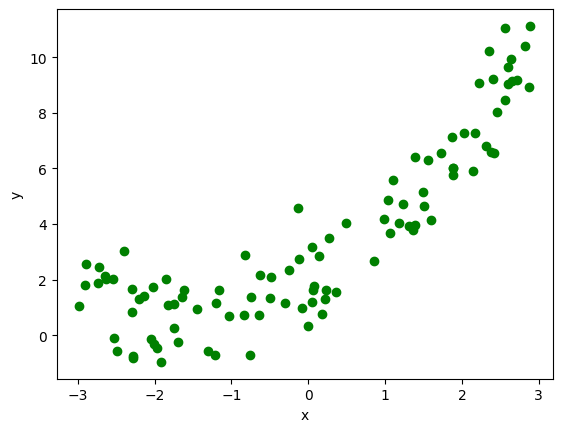

In [64]:
plt.scatter(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
#simple linear regression
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

In [67]:
from sklearn.metrics import r2_score
score= r2_score(y_test,lin_reg.predict(x_test))
print(score)

0.7448230831611257


Text(0, 0.5, 'y')

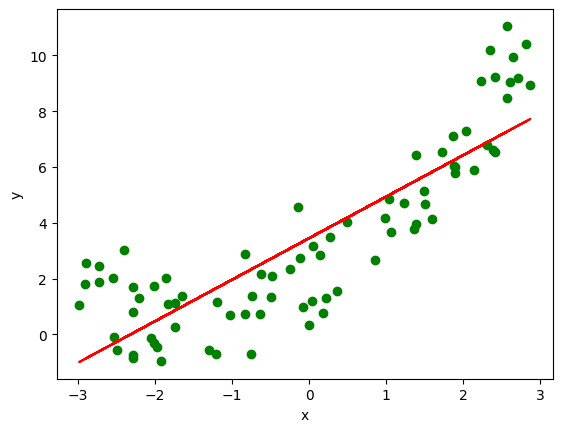

In [68]:
#VISUALIZE THIS MODEL
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='red')
plt.xlabel('x')
plt.ylabel('y')

In [69]:
#aplly polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly_reg.fit_transform(x_train) 
x_test_poly=poly_reg.transform(x_test)





In [70]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)

score= r2_score(y_test,y_pred)
print(score)

0.9531254479089339


In [71]:
print(regression.coef_)

[[0.         1.51221287 0.46850102]]


In [72]:
print(regression.intercept_)

[1.90083468]


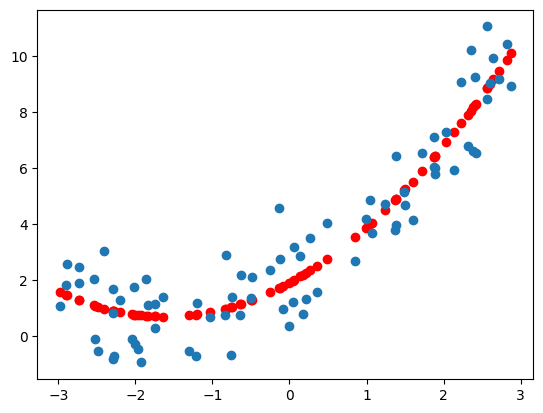

In [77]:
plt.scatter(x_train,regression.predict(x_train_poly),color='red')
plt.scatter(x_train,y_train)

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=poly_reg.fit_transform(x_train) 
x_test_poly=poly_reg.transform(x_test)

In [80]:
x_train_poly

array([[ 1.00000000e+00,  1.72371595e+00,  2.97119667e+00,
         5.12149908e+00],
       [ 1.00000000e+00,  2.41738613e+00,  5.84375569e+00,
         1.41266139e+01],
       [ 1.00000000e+00, -4.03480864e-03,  1.62796808e-05,
        -6.56853968e-08],
       [ 1.00000000e+00, -2.20010275e+00,  4.84045210e+00,
        -1.06494920e+01],
       [ 1.00000000e+00,  2.15274883e-01,  4.63432753e-02,
         9.97654317e-03],
       [ 1.00000000e+00, -7.40412597e-01,  5.48210814e-01,
        -4.05902193e-01],
       [ 1.00000000e+00,  2.71433335e+00,  7.36760555e+00,
         1.99981375e+01],
       [ 1.00000000e+00,  2.87116377e+00,  8.24358140e+00,
         2.36686722e+01],
       [ 1.00000000e+00,  3.59284813e-01,  1.29085577e-01,
         4.63784874e-02],
       [ 1.00000000e+00,  2.56760437e+00,  6.59259220e+00,
         1.69271686e+01],
       [ 1.00000000e+00, -7.57780100e-01,  5.74230680e-01,
        -4.35140582e-01],
       [ 1.00000000e+00, -2.04380921e+00,  4.17715607e+00,
      

In [82]:
#predict on test data
x_new= np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly_reg.transform(x_new)

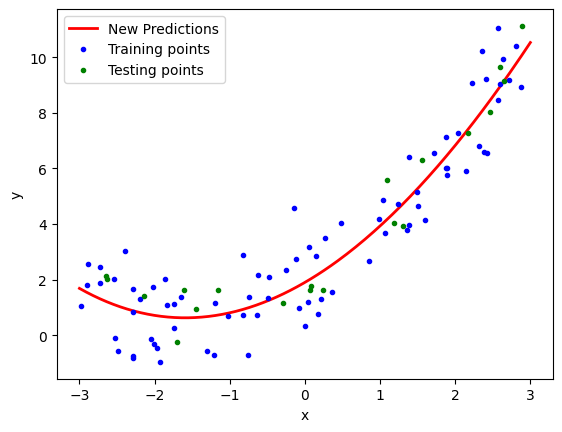

In [85]:
y_new=regression.predict(x_new_poly)

plt.plot(x_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(x_train, y_train, "b.",label="Training points")
plt.plot(x_test, y_test, "g.",label="Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left", fontsize=10)
plt.show()